# `01-import Data Open Street Map to Neo4j` Notebook

Notebooks are numbered in the order they should be run (for data import projects) or according to a table of contents:

* `00-setup` - initial environment setup and proof of concept
* `01-import` - exploratory data analysis


In this notebook we will use OSMNx and the Neo4j Python driver to import data from OpenStreetMap into Neo4j.

![](../img/data_model.png)

In [1]:
# Uncomment to install dependencies
!pip install neo4j
!pip install osmnx

In [2]:
import neo4j
import osmnx as ox

In [3]:
# Update with your Neo4j AuraDB credentials

NEO4J_URI = "neo4j+s://241e42c3.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "kluPre4qrTiPVhKhxnaJd5XwwlRJNz4ZvOAj58o9hDE"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

## OpenStreetMap Road Network With OSMNx

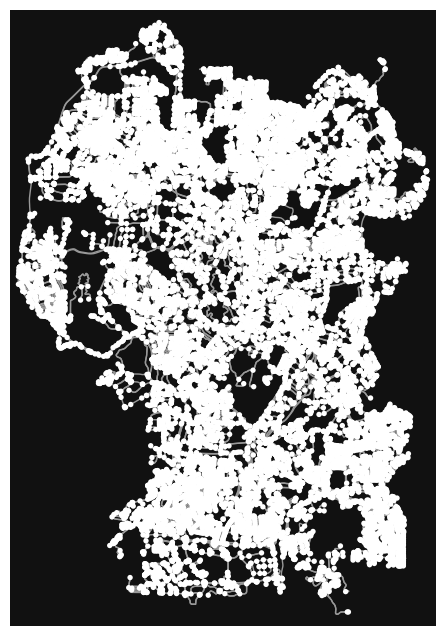

In [4]:
# Search OpenStreetMap and create a OSMNx graph

# Get the graph for Kuala Lumpur, Malaysia
G = ox.graph_from_place("Kuala Lumpur, Malaysia", network_type="drive")

fig, ax = ox.plot_graph(G)

In [5]:
# Our road network graph can be represented as two GeoDataFrames

gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,highway,ref,street_count,junction,geometry
0,28918006,3.145694,101.715023,traffic_signals,265,4,NaN,POINT (101.71502 3.14569)
1,28918012,3.150157,101.712922,NaN,NaN,3,NaN,POINT (101.71292 3.15016)
2,28930674,3.153913,101.707558,traffic_signals,NaN,4,NaN,POINT (101.70756 3.15391)
3,28930700,3.145127,101.706720,NaN,NaN,3,NaN,POINT (101.70672 3.14513)
4,28930723,3.150516,101.708223,NaN,NaN,3,NaN,POINT (101.70822 3.15052)
...,...,...,...,...,...,...,...,...
20896,12376410166,3.205825,101.669437,NaN,NaN,3,NaN,POINT (101.66944 3.20583)
20897,12376410168,3.205778,101.669254,NaN,NaN,3,NaN,POINT (101.66925 3.20578)
20898,12395422763,3.172398,101.714239,NaN,NaN,1,NaN,POINT (101.71424 3.1724)
20899,12395454342,3.117666,101.673051,NaN,NaN,3,NaN,POINT (101.67305 3.11767)


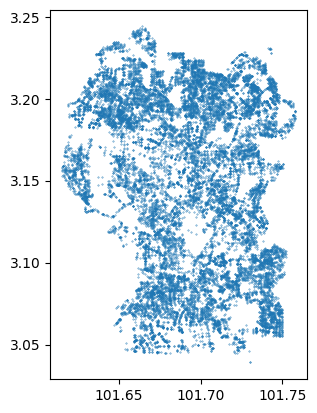

In [6]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,highway,lanes,name,oneway,reversed,length,geometry,maxspeed,bridge,ref,tunnel,access,junction,width
0,28918006,5748610209,0,141019908,tertiary,2,Jalan Barat,True,False,158.019465,"LINESTRING (101.71502 3.14569, 101.71508 3.145...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28918006,370318315,0,"[771729344, 145661249]",tertiary,3,Jalan Imbi,True,False,178.946060,"LINESTRING (101.71502 3.14569, 101.71494 3.145...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28918012,5567874307,0,"[1113253995, 772537516, 1113253997]",secondary,5,Jalan Raja Chulan,True,False,96.599977,"LINESTRING (101.71292 3.15016, 101.71312 3.150...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28930674,29674193,0,135623209,tertiary,2,Jalan P. Ramlee,True,False,15.174815,"LINESTRING (101.70756 3.15391, 101.70765 3.15402)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28930674,7261546074,0,4672548,secondary,3,Jalan Sultan Ismail,True,False,18.415633,"LINESTRING (101.70756 3.15391, 101.70753 3.153...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,12395454342,5668167795,0,479436438,residential,NaN,NaN,True,False,96.035247,"LINESTRING (101.67305 3.11767, 101.67313 3.117...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
44715,12395454342,7369242377,0,"[1120961172, 1340013902]",residential,NaN,NaN,True,False,97.513587,"LINESTRING (101.67305 3.11767, 101.67308 3.117...",NaN,NaN,NaN,yes,NaN,NaN,NaN
44716,12402056582,11027339455,0,1187550638,residential,NaN,NaN,False,False,8.017350,"LINESTRING (101.73379 3.0576, 101.73372 3.0576)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
44717,12402056582,11027339449,0,1187550638,residential,NaN,NaN,False,True,349.641021,"LINESTRING (101.73379 3.0576, 101.73544 3.0575...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


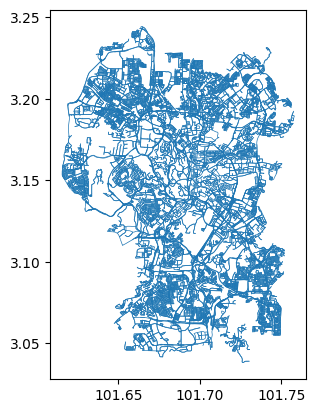

In [7]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

## Neo4j Import

In [8]:
# First, define Cypher queries to create constraints and indexes

constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [9]:
# Function to execute our constraint / index queries

def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)

In [10]:
# Function to batch our GeoDataFrames

def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1

In [11]:
# Run our constraints queries and nodes GeoDataFrame import

with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 901}]


In [12]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 4719}]


In [16]:
# Execute full text index query
with driver.session() as session:
    results = session.execute_write(lambda tx: tx.run(full_text_query))


In [38]:
## Import Points of Interest (POIs) using Overpass API to Neo4j


In [26]:
from neo4j import GraphDatabase
import requests
import json

# Step 1: Define Overpass API Query
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json][timeout:25];
(
  node["amenity"="restaurant"](3.1390, 101.6869, 3.1800, 101.7200);
  node["amenity"="school"](3.1390, 101.6869, 3.1800, 101.7200);
  node["amenity"="hospital"](3.1390, 101.6869, 3.1800, 101.7200);
  node["amenity"="parking"](3.1390, 101.6869, 3.1800, 101.7200);
  node["shop"="supermarket"](3.1390, 101.6869, 3.1800, 101.7200);
  node["shop"="convenience"](3.1390, 101.6869, 3.1800, 101.7200);
  node["shop"="mall"](3.1390, 101.6869, 3.1800, 101.7200);
  node["tourism"="hotel"](3.1390, 101.6869, 3.1800, 101.7200);
  node["tourism"="attraction"](3.1390, 101.6869, 3.1800, 101.7200);
  node["tourism"="museum"](3.1390, 101.6869, 3.1800, 101.7200);
  node["public_transport"="station"](3.1390, 101.6869, 3.1800, 101.7200);
  node["railway"="station"](3.1390, 101.6869, 3.1800, 101.7200);
  node["highway"="bus_stop"](3.1390, 101.6869, 3.1800, 101.7200);
);
out body;
>;
out skel qt;
"""

# Step 2: Fetch POI Data from Overpass API
response = requests.get(overpass_url, params={"data": overpass_query})

# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(f"Fetched {len(data['elements'])} POI elements.")
else:
    print("Error fetching data from Overpass API.")
    response.raise_for_status()

# Step 3: Save Data to GeoJSON File (Optional for Debugging)
geojson_file = "kuala_lumpur_pois.geojson"
with open(geojson_file, "w") as f:
    json.dump(data, f)
print(f"POI data saved to {geojson_file}")

# Step 4: Connect to Neo4j
uri = "neo4j+s://241e42c3.databases.neo4j.io"
username = "neo4j"
password = "kluPre4qrTiPVhKhxnaJd5XwwlRJNz4ZvOAj58o9hDE"  # Replace with your Neo4j password

driver = GraphDatabase.driver(uri, auth=(username, password))

# Step 5: Define Import Query for Neo4j
import_query = """
UNWIND $elements AS element
MERGE (poi:PointOfInterest {id: element.id})
SET poi.name = element.tags.name,
    poi.category = COALESCE(element.tags.amenity, element.tags.shop, element.tags.tourism, element.tags.public_transport, element.tags.railway, element.tags.highway),
    poi.subcategory = element.tags.amenity,
    poi.location = point({longitude: element.lon, latitude: element.lat});
"""

# Step 6: Filter Data for Import and Upload to Neo4j
# Ensure only nodes with lat/lon and valid tags are processed
filtered_elements = [
    element for element in data["elements"]
    if "lat" in element and "lon" in element
]


print(f"Filtered {len(filtered_elements)} elements for Neo4j import.")

with driver.session() as session:
    session.run(import_query, elements=filtered_elements)

print("POI data imported into Neo4j successfully.")


Fetched 1754 POI elements.
POI data saved to kuala_lumpur_pois.geojson
Filtered 1754 elements for Neo4j import.
POI data imported into Neo4j successfully.


In [5]:
import random
from heapq import heappop, heappush
from neo4j import GraphDatabase

# Define the DijkstraAlgorithm class
class DijkstraAlgorithm:
    def __init__(self, uri, user, password):
        # Initialize Neo4j driver
        self.driver = GraphDatabase.driver(uri, auth=(user, password))
    
    def close(self):
        # Close Neo4j driver
        self.driver.close()

    def dijkstra(self, start_id, end_id):
        with self.driver.session() as session:
            return session.execute_write(self._dijkstra, start_id, end_id)

    def _dijkstra(self, tx, start_id, end_id):
        # Initialize the nodes and their distances
        unvisited_nodes = {}
        visited_nodes = {}
        shortest_path = {}
        previous_nodes = {}
        
        # Set the initial distance for the start node
        unvisited_nodes[start_id] = 0
        
        # Run the algorithm until all nodes are visited
        while unvisited_nodes:
            # Get the node with the smallest distance
            current_node = min(unvisited_nodes, key=unvisited_nodes.get)
            
            # If the end node is reached, stop the search
            if current_node == end_id:
                break
            
           # Get the neighbors of the current node
            neighbors_query = """
            MATCH (current:Intersection {id: $current_node})-[r:ROAD_SEGMENT]->(neighbor)
            RETURN neighbor.id AS neighbor_id, r.length AS weight
            """

            result = tx.run(neighbors_query, current_node=current_node)
            neighbors_found = False  # Flag to check if any neighbors are found

            for record in result:
                neighbors_found = True
                neighbor_id = record["neighbor_id"]
                weight = record["weight"]
                
                # Calculate the tentative distance for the neighbor
                tentative_distance = unvisited_nodes[current_node] + weight
                
                # If the neighbor has not been visited or has a shorter distance, update the distance
                if neighbor_id not in unvisited_nodes or tentative_distance < unvisited_nodes[neighbor_id]:
                    unvisited_nodes[neighbor_id] = tentative_distance
                    previous_nodes[neighbor_id] = current_node

            # Debugging output
            if not neighbors_found:
                print(f"No neighbors found for node {current_node}.")
                            
              # Mark the current node as visited and remove it from the unvisited nodes
            visited_nodes[current_node] = unvisited_nodes[current_node]
            del unvisited_nodes[current_node]
        
        # Reconstruct the shortest path by following the previous nodes
        path = []
        current_node = end_id
        while current_node != start_id:
            if current_node in previous_nodes:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            else:
                # No path found
                return None, None
        path.append(start_id)
        
        path = path[::-1]  # Reverse the path to get the correct order
        
        # Return the shortest path and its distance
        return path, visited_nodes[end_id]

    def get_random_start_end_ids(self):
        # Select random start and end nodes from the database
        with self.driver.session() as session:
            result = session.execute_read(self._get_random_nodes)
            return result[0], result[1]  # Return a tuple of start_id and end_id

    @staticmethod
    def _get_random_nodes(tx):
        # Query to get random nodes (from PointOfInterest or Intersection)
        query = """
        MATCH (p:PointOfInterest)
        RETURN p.id AS id
        ORDER BY rand()
        LIMIT 2
        """
        result = tx.run(query)
        nodes = [record["id"] for record in result]
        return nodes  # Return a list of node IDs


# Example usage
if __name__ == "__main__":
    # Set up Neo4j connection details
    uri = "neo4j+s://241e42c3.databases.neo4j.io"
    username = "neo4j"
    password = "kluPre4qrTiPVhKhxnaJd5XwwlRJNz4ZvOAj58o9hDE"  # Replace with your Neo4j password
    # Initialize DijkstraAlgorithm instance
    dijkstra = DijkstraAlgorithm(uri, username, password)

    # Get random start and end node IDs
    start_node, end_node = dijkstra.get_random_start_end_ids()
    print(f"Start Node: {start_node}, End Node: {end_node}")

    # Call Dijkstra's algorithm to find the shortest path
    path, distance = dijkstra.dijkstra(start_node, end_node)
    
    # Print the result
    if path:
        print(f"Shortest path from {start_node} to {end_node}: {path}")
        print(f"Total distance: {distance}")
    else:
        print(f"No path found from {start_node} to {end_node}")

    # Close the DijkstraAlgorithm instance
    dijkstra.close()


Start Node: 5426279122, End Node: 7208020715
No neighbors found for node 5426279122.
No path found from 5426279122 to 7208020715
